<a href="https://colab.research.google.com/github/SeiichiroFukushima/keras/blob/master/LSTM_try04-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 溶接電源特徴量及びスパッタ発生量データのフォーマット
>   index データ名称
*   	0   No.
*     1	  ｶﾒﾗ時間
*     2	  ｽﾊﾟｯﾀ量
*     3	  FB電流
*   	4	  FB電圧
*   	5	  ｱｰｸ切れ発生時間
*   	6	  短絡時間
*   	7	  ｱｰｸ時間
*   	8   短絡回数
*   	9	  ﾊﾟﾙｽ回数
*   	10	ﾈｯｷﾝｸﾞ失敗回数
*   	11	ﾈｯｷﾝｸﾞ時間
*   	12	ｱｰｸ期間ﾋﾟｰｸ電圧
*   	13	ｱｰｸ期間ﾋﾟｰｸ電流
*   	14	短絡開放電流
*   	15	短絡移行前ｱｰｸ電流
*   	16	微小短絡回数
*   	17	微小短絡発生前ｱｰｸ電流
*   	18	異常短絡開放発生回数
*   	19	ﾋﾟｰｸ短絡回数
*   	20	ﾊﾟﾙｽﾍﾞｰｽ時燃え上がり発生回数
*   	21	電流補償継続時間
*   	22	1周期毎の電流補正量
*   	23	1周期毎の電圧補正量
*   	24	1周期毎の時間補正量
*   	25	1周期毎の送給速度補正量
*   	26	予備


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

dataset_path ='/content/drive/MyDrive/Colab Notebooks/dataset/welding_data'
data_path='/W12_CO2Shrt/'
file_name='RENEW_No_255_WeldValue_20230531075723.csv'

#csvファイルの読み込み
data=pd.read_csv(dataset_path+data_path+file_name).values

# {No.}（一番左側から１つ）は使わないので除去する
data=data[:,1:]

print(data.shape)

Mounted at /content/drive
(9999, 26)


In [2]:
data

array([[ 287500,       5,     276, ...,       0,       0,       0],
       [ 288000,       5,     267, ...,       0,       0,       0],
       [ 288500,       1,     257, ...,       0,       0,       0],
       ...,
       [5285500,       0,     168, ...,       0,       0,       0],
       [5286000,       3,     101, ...,       0,       0,       0],
       [5286500,       0,      31, ...,       0,       0,       0]])

(25,)


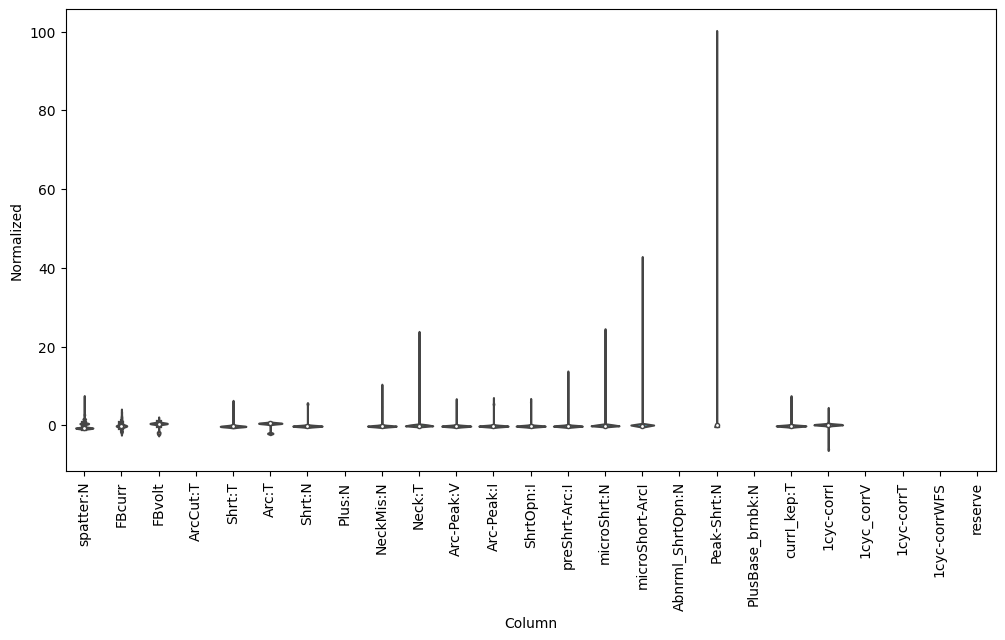

In [3]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# CameraTimeがゼロになる行を除外
CameraTime_index = 0
zero_rows = np.where(data[:, CameraTime_index] == 0)[0]
data = np.delete(data, zero_rows, axis=0)

label_name =['spatter:N','FBcurr','FBvolt','ArcCut:T','Shrt:T','Arc:T','Shrt:N','Plus:N','NeckMis:N','Neck:T','Arc-Peak:V','Arc-Peak:I','ShrtOpn:I','preShrt-Arc:I','microShrt:N','microShort-ArcI','Abnrml_ShrtOpn:N','Peak-Shrt:N','PlusBase_brnbk:N','currI_kep:T','1cyc-corrI','1cyc_corrV','1cyc-corrT','1cyc-corrWFS','reserve']
label = np.array(label_name)

# {ｶﾒﾗ時間}（一番左側から１つ）は使わないので除去する
data=data[:,1:]

print(label.shape)

df = pd.DataFrame(data)

train_mean = df.mean()
train_std = df.std()

df_std = (df - train_mean) / train_std
#df_std = df
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
#_ = ax.set_xticklabels(label_name, rotation=90)
_ = ax.set_xticklabels(label.tolist(), rotation=90)



# 正規化データに基づくデータ列の削除
バイオリンプロットに表示されていないデータはすべてがゼロ値のデータなので、除外する。

index:3,7,16,18,21,22,23,24

name:ArcCut:T,Plus:N,Abnrml_ShrtOpn:N,PlusBase_brnbk:N,1cyc_corrV,1cyc-corrT,1cyc-corrWFS,reserve


In [4]:
print(data.shape)

# ゼロ値のデータ列を除外する。除外する列のインデックスを指定
columns_to_exclude = [3,7,16,18,21,22,23,24]

# スライシングを使って特定の列を除外
result = data[:, np.logical_not(np.isin(np.arange(data.shape[1]), columns_to_exclude))]
result_label = label[np.logical_not(np.isin(np.arange(label.shape[0]), columns_to_exclude))]

print(result.shape)


(9999, 25)
(9999, 17)


In [5]:
result_label

array(['spatter:N', 'FBcurr', 'FBvolt', 'Shrt:T', 'Arc:T', 'Shrt:N',
       'NeckMis:N', 'Neck:T', 'Arc-Peak:V', 'Arc-Peak:I', 'ShrtOpn:I',
       'preShrt-Arc:I', 'microShrt:N', 'microShort-ArcI', 'Peak-Shrt:N',
       'currI_kep:T', '1cyc-corrI'], dtype='<U16')

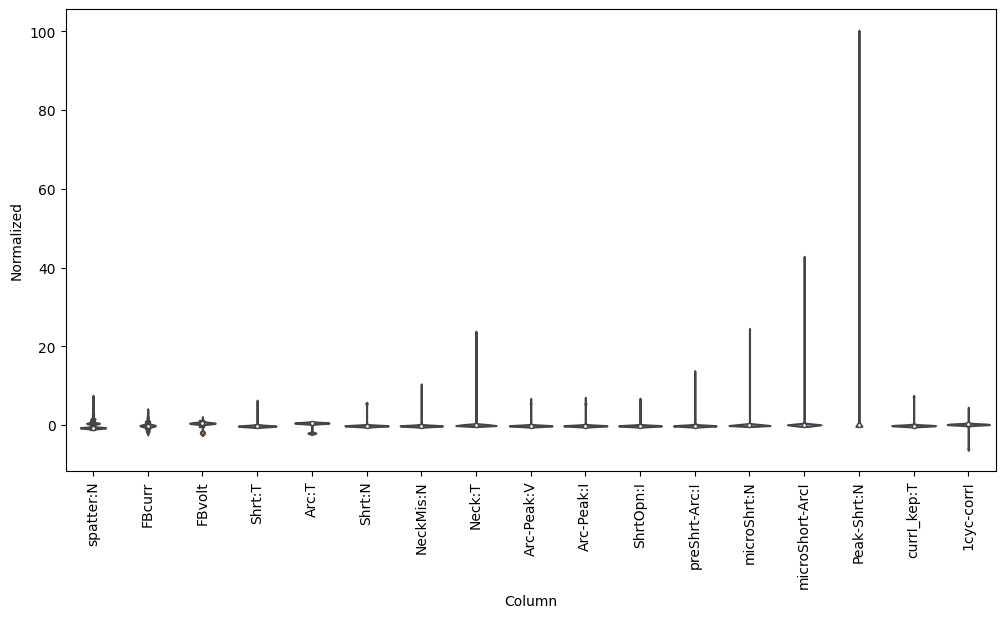

In [71]:
df = pd.DataFrame(result)

train_mean = df.mean()
train_std = df.std()

df_std = (df - train_mean) / train_std
#df_std = df
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(result_label, rotation=90)


In [8]:
#データを入力(X)１５個、出力(Y)１つに分ける
#CurrFB, VoltFBのうちCurrFBだけ除外してみる。
input_data=data[:,2:17]
output_data=data[:,0:1]

print( 'input_data=[', input_data.shape[0], ',', input_data.shape[1], ']')
print( 'output_data=[', output_data.shape[0], ',', output_data.shape[1],']')


input_data=[ 9999 , 15 ]
output_data=[ 9999 , 1 ]


In [9]:
output_data

array([[5],
       [5],
       [1],
       ...,
       [0],
       [3],
       [0]])

In [14]:
data.shape[1]

25

# ダウンサンプリングする
実電圧は区間平均値を算出して、その他の配列は区間的に和を算出する。

In [13]:
result_label.shape[0]


17

In [18]:
# サンプルのndarray
data_array = result

# カラム名のリスト
columns = result_label

# ndarrayをデータフレームに変換
df = pd.DataFrame(data=data_array, columns=columns)


In [19]:
# タイムスタンプの範囲を生成
time_index = pd.date_range(start='2023-05-28 00:00:00', periods=len(df), freq='500us')

# タイムスタンプをデータフレームのインデックスとして設定
df = df.set_index(time_index)

In [20]:
# データフレームを表示
print(df)

                            spatter:N  FBcurr  FBvolt  Shrt:T  Arc:T  Shrt:N  \
2023-05-28 00:00:00.000000          5     276     385       0     25       0   
2023-05-28 00:00:00.000500          5     267     386       0     25       0   
2023-05-28 00:00:00.001000          1     257     380       0     25       0   
2023-05-28 00:00:00.001500          4     255     385       0     25       0   
2023-05-28 00:00:00.002000          2     251     386       0     25       0   
...                               ...     ...     ...     ...    ...     ...   
2023-05-28 00:00:04.997000          0     185     396       0     25       0   
2023-05-28 00:00:04.997500          0     174     421       0     25       0   
2023-05-28 00:00:04.998000          0     168     436       0     25       0   
2023-05-28 00:00:04.998500          3     101     468       0     25       0   
2023-05-28 00:00:04.999000          0      31     522       0     25       0   

                            NeckMis:N  

IndexError: ignored

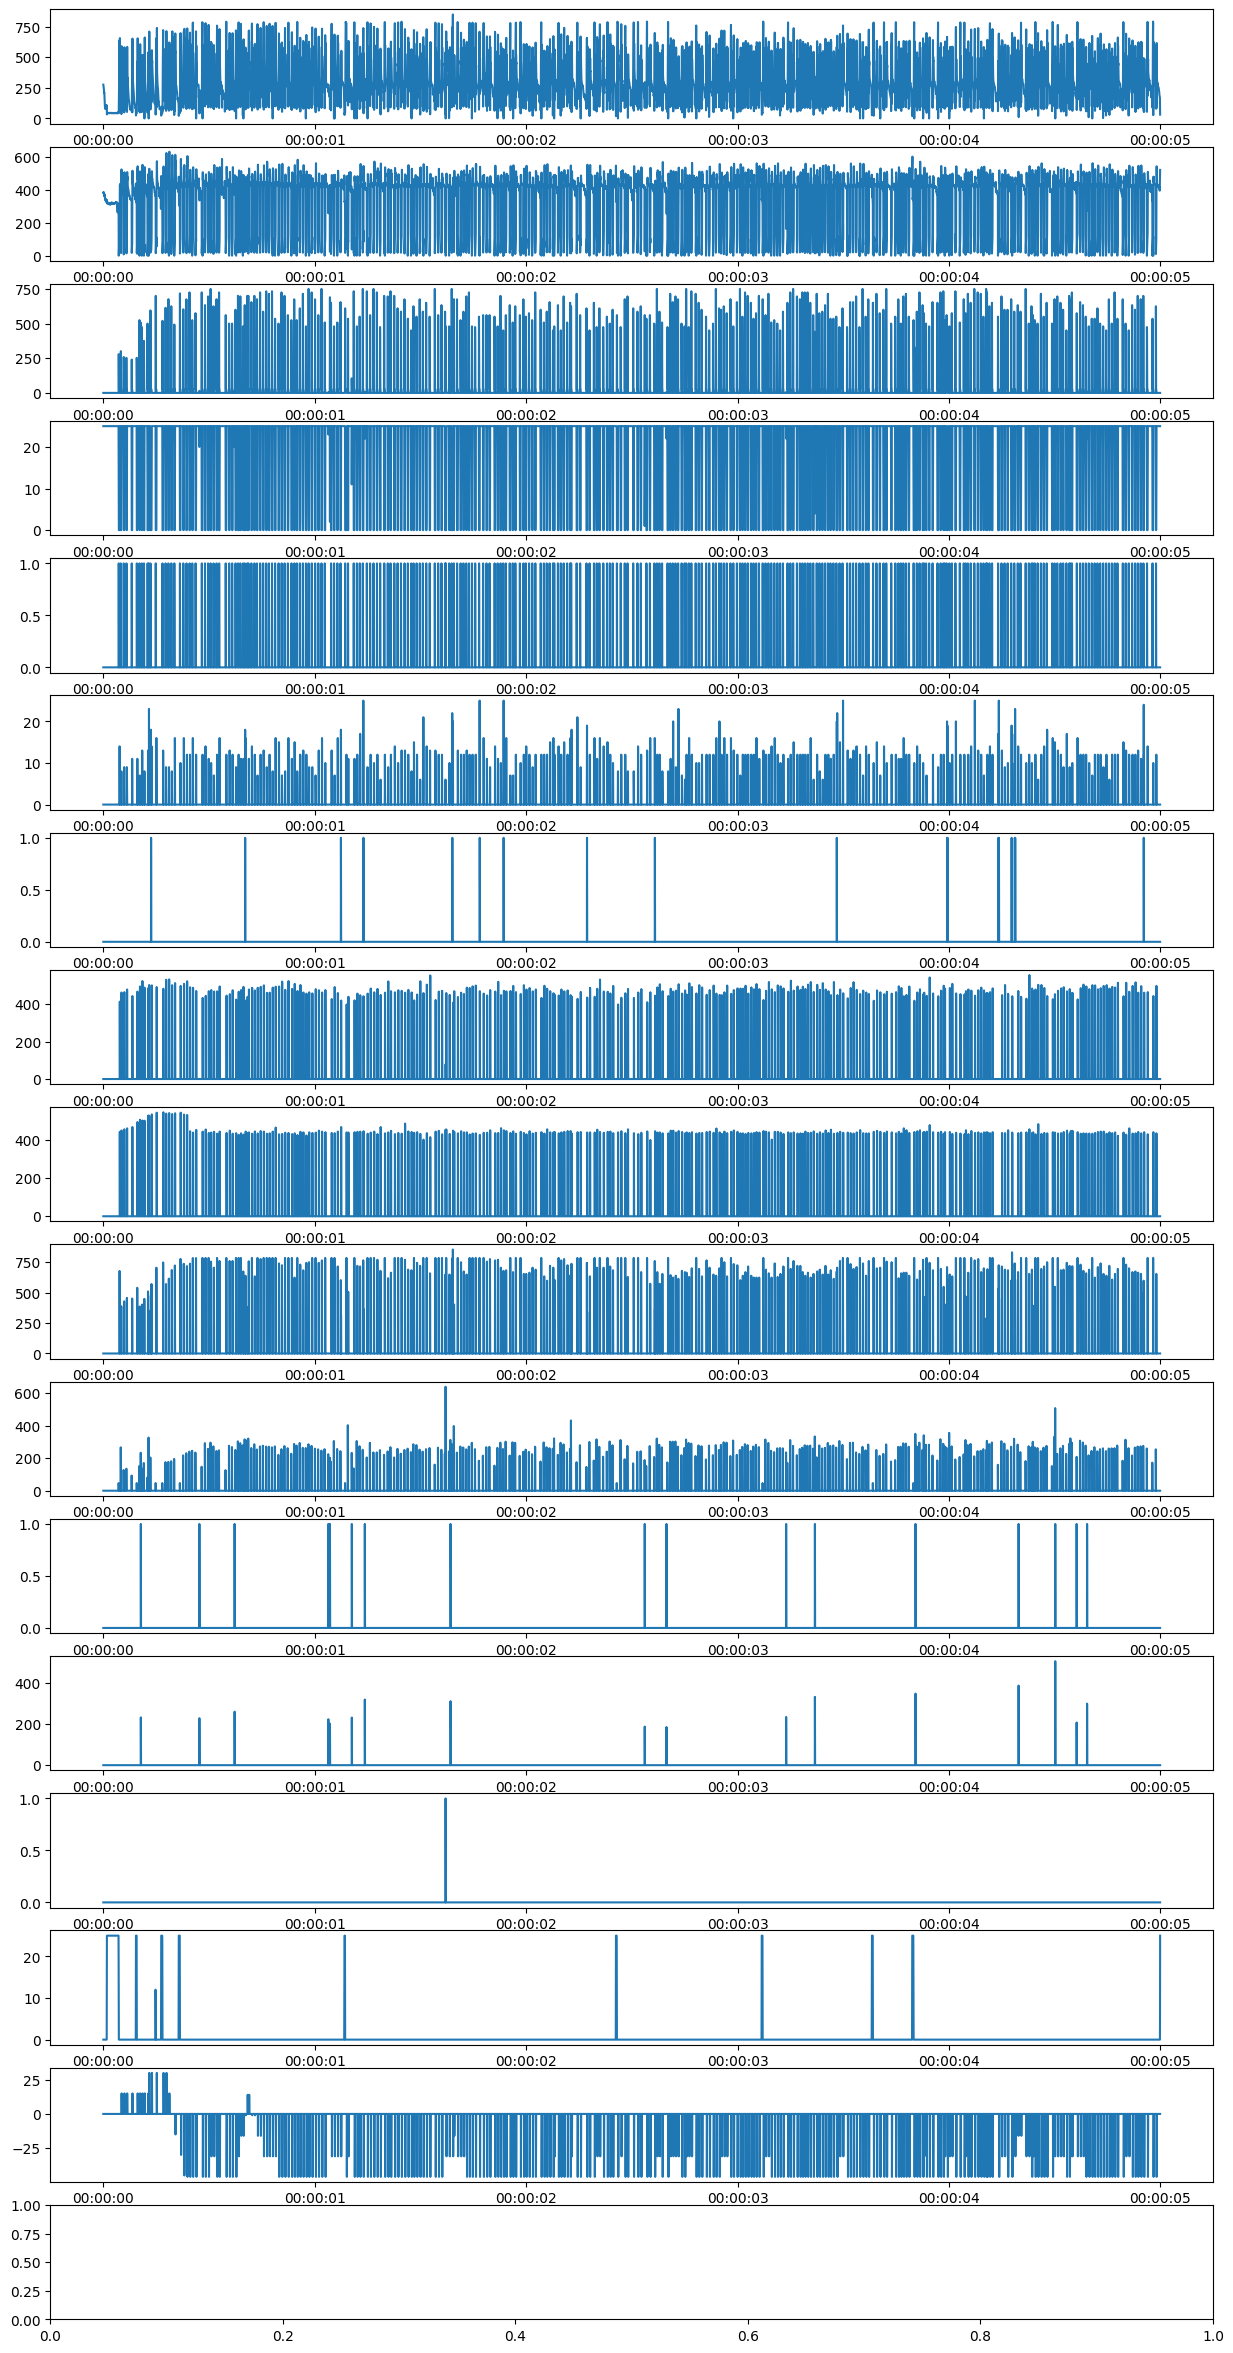

In [24]:
import matplotlib.pyplot as plt

# Figureオブジェクトを作成し、サブプロットを追加する
fig, axs = plt.subplots(nrows=17,figsize=(15,30))

# 各サブプロットにデータをプロットする
for i in range(17):
    axs[i].plot(df.iloc[:,i+1])

# 軸のラベルを設定する
fig.text(0.5, 0.05, 'Time[us]', ha='center', fontsize=16)
fig.text(0.1, 0.5, 'Data', va='center', rotation='vertical', fontsize=16)

# グラフを表示する
plt.show()

In [25]:
# 6msごとにダウンサンプリング
df_resampled = df.resample('6ms').sum()

In [26]:
df_resampled

,spatter:N,FBcurr,FBvolt,Shrt:T,Arc:T,Shrt:N,NeckMis:N,Neck:T,Arc-Peak:V,Arc-Peak:I,ShrtOpn:I,preShrt-Arc:I,microShrt:N,microShort-ArcI,Peak-Shrt:N,currI_kep:T,1cyc-corrI
2023-05-28 00:00:00.000,37,2788,4540,0,300,0,0,0,0,0,0,0,0,0,0,0,0
2023-05-28 00:00:00.006,24,1228,4178,0,300,0,0,0,0,0,0,0,0,0,0,0,0
2023-05-28 00:00:00.012,11,1044,3986,0,300,0,0,0,0,0,0,0,0,0,0,71,0
2023-05-28 00:00:00.018,9,530,3846,0,300,0,0,0,0,0,0,0,0,0,0,300,0
2023-05-28 00:00:00.024,10,527,3806,0,300,0,0,0,0,0,0,0,0,0,0,300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-28 00:00:04.974,12,2995,4354,923,238,1,0,0,0,0,0,254,0,0,0,0,0
2023-05-28 00:00:04.980,12,4558,4359,70,230,0,12,0,497,434,653,0,0,0,0,0,-46
2023-05-28 00:00:04.986,10,3247,5121,0,300,0,0,0,0,0,0,0,0,0,0,0,0
2023-05-28 00:00:04.992,7,2531,4971,0,300,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Xdata=[]
Ydata=[]
#LSTM用にデータ加工
#入力データの時間：5x200ms １秒間の傾向
look_back=5
number = int( data.shape[0] / look_back ) - 1
for i in range(number):
    Xtimedata=[]
    data_head = i * look_back
    for j in range(input_data.shape[1]):
        Xtimedata.append(input_data[data_head:data_head+look_back,j])
    Xtimedata=np.array(Xtimedata)
    Xtimedata=Xtimedata.transpose()
    Xdata.append(Xtimedata)
    Ytimedata=[]
    sum=0
    for j in range(look_back):
        sum += output_data[data_head+j,0]
    Ytimedata.append(sum/look_back)
    Ydata.append(Ytimedata)

In [ ]:
Xdata=np.array(Xdata)
Ydata=np.array(Ydata)

print(Xdata.shape)
#print(Xdata)
print(Ydata.shape)
#print(Ydata)


(159, 5, 11)
(159, 1)


In [ ]:
#ライブラリインポート
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

In [ ]:
train_mean = Xdata.mean()
train_std = Xdata.std()

test_mean = Ydata.mean()
test_std = Ydata.std()

Xdata = (Xdata - train_mean) / train_std
Ydata = (Ydata - test_mean) / test_std

In [ ]:
Ydata

array([[ 0.08394745],
       [-0.25940032],
       [-0.15746895],
       [-0.37206131],
       [-0.09309125],
       [-0.64566657],
       [-0.26476513],
       [-0.83343489],
       [ 0.4112008 ],
       [ 0.01956974],
       [-0.57592405],
       [ 0.04639379],
       [-0.59738329],
       [ 0.44875446],
       [ 2.80390561],
       [ 4.45090197],
       [ 4.18266152],
       [ 2.47128745],
       [ 3.34575131],
       [ 2.39618012],
       [ 2.03137311],
       [-1.19287709],
       [-0.9031774 ],
       [-0.93536626],
       [-0.60811291],
       [-1.29480846],
       [-1.05339205],
       [ 0.28781019],
       [-0.91390702],
       [-0.49008711],
       [ 0.03566417],
       [-0.661761  ],
       [ 0.60433392],
       [-0.9621903 ],
       [ 0.07858264],
       [-0.0662672 ],
       [ 1.12472039],
       [ 3.01849797],
       [ 2.09038601],
       [ 0.48094332],
       [ 0.49703774],
       [ 0.94231689],
       [ 0.40583599],
       [-0.33450765],
       [ 1.90798251],
       [ 1

In [ ]:
#学習用の情報指定
Xdim=Xdata.shape[2]
Ydim=Ydata.shape[1]
validation_split_rate=0.2
print('Xdim=',Xdim,', Ydim=',Ydim,', validation_split_rate=',validation_split_rate)

Xdim= 11 , Ydim= 1 , validation_split_rate= 0.2


In [ ]:
#モデル構築
#LSTMレイヤを多層化して複雑な表現ができるようにする。
#LSTM(34,...の34はユニット数でより複雑で長期的な傾向を理解するためにはユニット数をある程度の大きさにする。

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back,Xdim)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(Ydim))
model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.001))
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 5, 50)             12400     
                                                                 
 lstm_35 (LSTM)              (None, 5, 50)             20200     
                                                                 
 lstm_36 (LSTM)              (None, 50)                20200     
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 52,851
Trainable params: 52,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#学習開始
history=model.fit(Xdata,Ydata,batch_size=16,epochs=250,validation_split=validation_split_rate)

Epoch 1/250
8/8 [==============================] - 9s 286ms/step - loss: 1.1727 - val_loss: 0.4252
Epoch 2/250
8/8 [==============================] - 0s 31ms/step - loss: 1.1486 - val_loss: 0.4025
Epoch 3/250
8/8 [==============================] - 0s 29ms/step - loss: 1.1397 - val_loss: 0.4009
Epoch 4/250
8/8 [==============================] - 0s 30ms/step - loss: 1.1291 - val_loss: 0.3995
Epoch 5/250
8/8 [==============================] - 0s 30ms/step - loss: 1.1154 - val_loss: 0.4113
Epoch 6/250
8/8 [==============================] - 0s 28ms/step - loss: 1.0881 - val_loss: 0.3931
Epoch 7/250
8/8 [==============================] - 0s 27ms/step - loss: 1.0237 - val_loss: 0.3775
Epoch 8/250
8/8 [==============================] - 0s 26ms/step - loss: 0.8833 - val_loss: 0.3416
Epoch 9/250
8/8 [==============================] - 0s 26ms/step - loss: 0.6331 - val_loss: 0.3195
Epoch 10/250
8/8 [==============================] - 0s 28ms/step - loss: 0.4261 - val_loss: 0.5733
Epoch 11/250
8/8 [

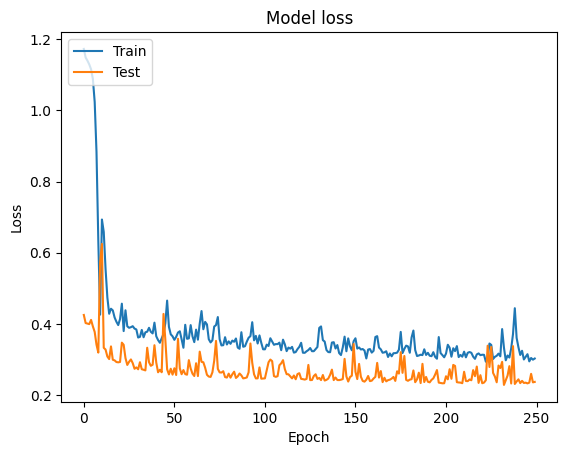

In [ ]:
#学習履歴のグラフ化
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#学習データから学習時にテストデータとして用いた部分を取り出す
Xdata_validation=Xdata[-int(len(Xdata)*(validation_split_rate)):]
Ydata_validation=Ydata[-int(len(Ydata)*(validation_split_rate)):]

1/1 [==============================] - 2s 2s/step


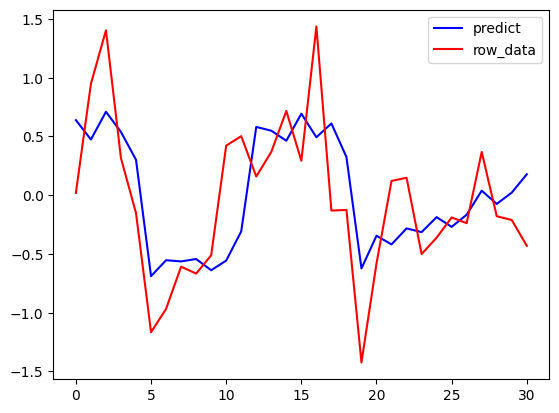

In [ ]:
#テスト
Predictdata = model.predict(Xdata_validation)
#テスト結果のグラフ化
plt.plot(range(0, len(Predictdata)),Predictdata[:,0], color="b", label="predict")
plt.plot(range(0, len(Ydata_validation)),Ydata_validation[:,0], color="r", label="row_data")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
predict_df = pd.DataFrame(Predictdata, columns=["predict"])
validation_df = pd.DataFrame(Ydata_validation, columns=["row_data"])
predict_df.to_csv("/content/drive/MyDrive/Colab Notebooks/RENEW_predict_data0623-1.csv", index=False)
validation_df.to_csv("/content/drive/MyDrive/Colab Notebooks/RENEW_validation_data0623-1.csv", index=False)
